In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [41]:
def display_distrib(pd, feature):
    plt.figure()
    sns.distplot(pd[feature].dropna() , fit=norm);
    # sns.distplot(pd[feature].dropna() , kde=False);
    (mu, sigma) = norm.fit(pd[feature].dropna())
    
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution')
    plt.show()

In [2]:
df_user = pd.read_csv("user.csv", encoding='utf-8-sig').sample(frac=0.1, replace=True)
df_ad = pd.read_csv("ad.csv", encoding='utf-8-sig').sample(frac=0.01, replace=True)

In [3]:
# https://blog.csdn.net/weixin_42782150/article/details/89546357
df_click_log = pd.read_csv("click_log.csv", encoding='utf-8-sig')

In [4]:
df_click_log = df_click_log.join(df_user.set_index('user_id'),on='user_id')[df_click_log.columns]

In [5]:
df_user.shape, df_ad.shape, df_click_log.shape

((90000, 3), (24811, 6), (30225952, 4))

## user 分析

In [34]:
df_user_unique = df_user.drop_duplicates(keep="last")
df_user_unique.shape
# 无空值

(85693, 3)

In [38]:
df_user_unique.describe()

,user_id,age,gender
count,85693.000000,85693.000000,85693.000000
mean,451163.803730,4.237044,1.330295
std,259385.909998,2.002554,0.470322
min,14.000000,1.000000,1.000000
25%,226696.000000,3.000000,1.000000
50%,452031.000000,4.000000,1.000000
75%,675682.000000,6.000000,2.000000
max,899998.000000,10.000000,2.000000


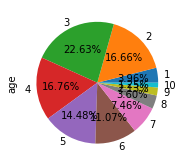

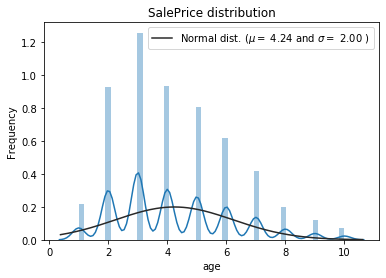

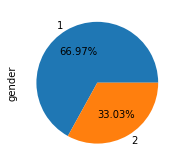

In [61]:
ax1 = plt.subplot(121)
df_user_unique['age'].value_counts().sort_index().plot(kind='pie',autopct='%.2f%%')
display_distrib(df_user_unique, 'age')
ax2 = plt.subplot(122)
df_user_unique['gender'].value_counts().sort_values(ascending=False).plot(kind='pie',autopct='%.2f%%')
# display_distrib(df_user_unique, 'gender')

In [60]:
df_user_unique['age'].value_counts().sort_index()

1      3396
2     14276
3     19390
4     14362
5     12412
6      9485
7      6396
8      3081
9      1821
10     1074
Name: age, dtype: int64

## ad 分析

In [62]:
df_ad.head(5)
# \N 是啥？

,creative_id,ad_id,product_id,product_category,advertiser_id,industry
558377,963757,848291,1766,2,17442,319
2071300,3679633,3166561,2103,2,51875,322
2335474,4160693,3569434,1810,2,47867,319
116344,179702,161184,\N,5,18960,202
553323,954250,840288,10918,8,12737,328


In [65]:
df_ad.dtypes

creative_id          int64
ad_id                int64
product_id          object
product_category     int64
advertiser_id        int64
industry            object
dtype: object

In [68]:
df_ad.isnull().sum()

creative_id         0
ad_id               0
product_id          0
product_category    0
advertiser_id       0
industry            0
dtype: int64

In [78]:
print("df_ad:\t", df_ad.shape)
# for key in ['creative_id', 'ad_id', 'product_id', 'product_category', 'advertiser_id', 'industry']:
for key in df_ad.columns:
    print(key, ':\t', df_ad[key].unique().shape)

df_ad:	 (24811, 6)
creative_id :	 (24676,)
ad_id :	 (24655,)
product_id :	 (3549,)
product_category :	 (17,)
advertiser_id :	 (9100,)
industry :	 (216,)


## click_log.csv 分析

In [79]:
df_click_log.head(5)

,time,user_id,creative_id,click_times
0,9,30920,567330,1
1,65,30920,3072255,1
2,56,30920,2361327,1
3,6,309204,325532,1
4,59,309204,2746730,1


C:\ProgramData\Anaconda3\envs\venv3.6_tf1.10\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


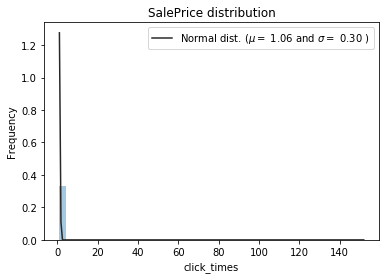

In [81]:
display_distrib(df_click_log, 'click_times')

In [82]:
df_click_log['click_times'].value_counts()

1      28561736
2       1514697
3         90806
4         43262
5          7544
6          3534
7          1532
8          1492
9           453
10          270
11          173
12          116
13           76
14           63
15           37
16           34
17           23
18           21
21           17
20           13
19           10
22            5
23            4
27            4
26            3
32            3
30            3
24            3
25            2
28            2
29            2
33            2
37            2
67            1
34            1
35            1
36            1
43            1
44            1
50            1
152           1
Name: click_times, dtype: int64

# https://blog.csdn.net/toshibahuai/article/details/79034829
df_user.to_csv('user.sample.csv')
df_ad.to_csv('ad.sample.csv')
df_click_log.to_csv('df_click_log.sample.csv')